In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/archive-zip-file/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telco-customer-churn-csv/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telco-customer-churn-logisticregression/Rplot001.png
/kaggle/input/telco-customer-churn-logisticregression/__results__.html
/kaggle/input/telco-customer-churn-logisticregression/__output__.json
/kaggle/input/telco-customer-churn-logisticregression/custom.css
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___20_1.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___18_1.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___31_1.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___85_0.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___14_1.png
/kaggle/input/telco-customer-churn-logisticreg

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Information about dataset
df.info()

# Check missing values
df.isnull().sum()

# Distribution of Churn
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
# Convert TotalCharges to numeric (coerce errors into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check again
df.info()
df['TotalCharges'].isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


11

In [5]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_clean = df.copy()

# Label Encoding for binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# One-Hot Encoding for multi-class columns
multi_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

df_clean = pd.get_dummies(df_clean, columns=multi_cols)

df_clean.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [7]:
from sklearn.model_selection import train_test_split

# X = features (all columns except Churn)
X = df_clean.drop('Churn', axis=1)

# y = target (only Churn column)
y = df_clean['Churn']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5634, 41)
Test shape: (1409, 41)


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns (object or category dtype)
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoding to categorical columns, leave numeric as is
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'  # keep numeric columns
)

X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

print("Encoded train shape:", X_train_encoded.shape)
print("Encoded test shape:", X_test_encoded.shape)


Encoded train shape: (5634, 5674)
Encoded test shape: (1409, 5674)


In [9]:
from sklearn.impute import SimpleImputer

# Create imputer (fill missing values with 0)
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to encoded train and test data
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

print("After imputation:", X_train_encoded.shape, X_test_encoded.shape)


After imputation: (5634, 5674) (1409, 5674)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression on imputed data
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_encoded, y_train)

# Predictions
y_pred = model.predict(X_test_encoded)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
  

Accuracy: 0.7366926898509581

Confusion Matrix:
 [[749 286]
 [ 85 289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



In [11]:
# Probabilities of churn (class 1)
y_proba = model.predict_proba(X_test_encoded)[:, 1]

print("First 10 predicted churn probabilities:", y_proba[:10])


First 10 predicted churn probabilities: [0.08949874 0.86007275 0.15292184 0.68186572 0.03657112 0.81500091
 0.71244097 0.29452677 0.00796878 0.58296143]


ROC-AUC Score: 0.8396109431915058


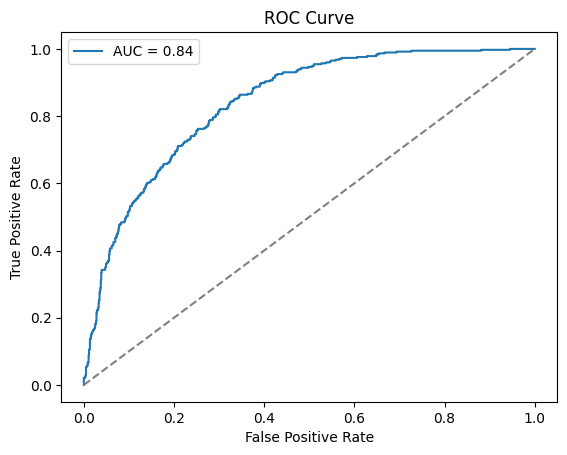

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Calculate AUC score
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

# 2. Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 3. Plot ROC Curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [13]:
import pandas as pd

# Get feature names after OneHotEncoding
feature_names = ct.get_feature_names_out()

# Get feature importance (coefficients in logistic regression)
importance = model.coef_[0]

# Put into DataFrame
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", key=abs, ascending=False)

print(feat_imp.head(15))  # show top 15 important features


                                                Feature  Importance
5669                       remainder__Contract_Two year   -1.030258
5667                 remainder__Contract_Month-to-month    0.830144
5646                     remainder__InternetService_DSL   -0.456804
5647             remainder__InternetService_Fiber optic    0.440265
5640                        remainder__PaperlessBilling    0.305524
5639                            remainder__PhoneService   -0.286025
5643                        remainder__MultipleLines_No   -0.263328
5637                              remainder__Dependents   -0.223387
5651                      remainder__OnlineSecurity_Yes   -0.207772
5649                       remainder__OnlineSecurity_No    0.191233
5672          remainder__PaymentMethod_Electronic check    0.185072
5644          remainder__MultipleLines_No phone service    0.168872
5660                         remainder__TechSupport_Yes   -0.168002
5658                          remainder__TechSup

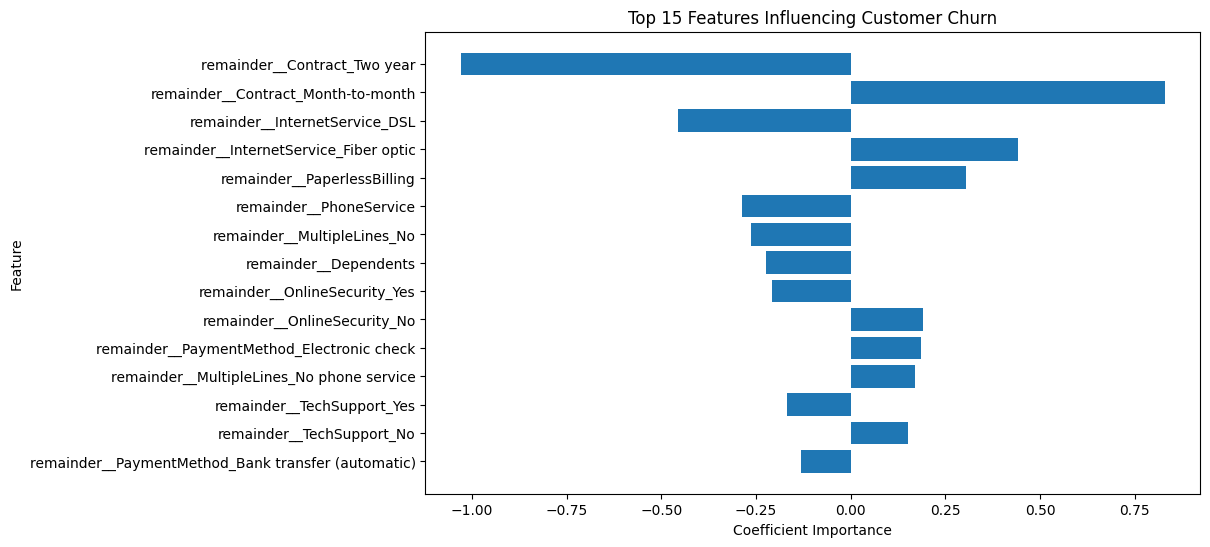

In [14]:
import matplotlib.pyplot as plt

# Take top 15 features
top_features = feat_imp.head(15)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.xlabel("Coefficient Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features Influencing Customer Churn")
plt.gca().invert_yaxis()  # biggest on top
plt.show()


In [15]:
# Example: take one customer from test set
sample = X_test.iloc[0:1]   # first row of test data
sample_encoded = ct.transform(sample)  # apply same encoding

# Predict churn
prediction = model.predict(sample_encoded)
probability = model.predict_proba(sample_encoded)[0][1]  # probability of churn

print("Predicted class:", prediction[0])  
print("Churn probability:", probability)


Predicted class: 0
Churn probability: 0.08949873812913013


In [16]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Churn_Probability": y_proba
})
print(results.head(10))


      Actual  Predicted  Churn_Probability
437        0          0           0.089499
2280       0          1           0.860073
2235       0          0           0.152922
4460       0          1           0.681866
3761       0          0           0.036571
5748       0          1           0.815001
3568       0          1           0.712441
2976       0          0           0.294527
5928       0          0           0.007969
1639       1          1           0.582961


In [17]:
import joblib

# Save
joblib.dump(model, "churn_model.pkl")
joblib.dump(ct, "encoder.pkl")

# Load later
# model = joblib.load("churn_model.pkl")
# ct = joblib.load("encoder.pkl")


['encoder.pkl']

In [18]:
import joblib
import pandas as pd

# Suppose you did:
X_train_encoded = pd.get_dummies(X_train)

# Save model + training columns
joblib.dump(model, "churn_model.pkl")
joblib.dump(X_train_encoded.columns, "training_columns.pkl")


['training_columns.pkl']

In [19]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/archive-zip-file/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telco-customer-churn-csv/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telco-customer-churn-logisticregression/Rplot001.png
/kaggle/input/telco-customer-churn-logisticregression/__results__.html
/kaggle/input/telco-customer-churn-logisticregression/__output__.json
/kaggle/input/telco-customer-churn-logisticregression/custom.css
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___20_1.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___18_1.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___31_1.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___85_0.png
/kaggle/input/telco-customer-churn-logisticregression/__results___files/__results___14_1.png
/kaggle/input/telco-customer-churn-logisticreg

In [20]:
import pandas as pd

# Option 1
# df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Option 2
df = pd.read_csv("/kaggle/input/telco-customer-churn-csv/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
print(df.head())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [21]:
# Dataset information
print("\n--- Dataset Info ---")
print(df.info())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\n--- Summary Statistics ---")
print(df.describe())

# Check target variable distribution (Churn column)
print("\n--- Churn Distribution ---")
print(df['Churn'].value_counts())

# Preview unique values in categorical columns
print("\n--- Sample Unique Values in Each Column ---")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:5]} ...")  # show only first 5 unique values



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

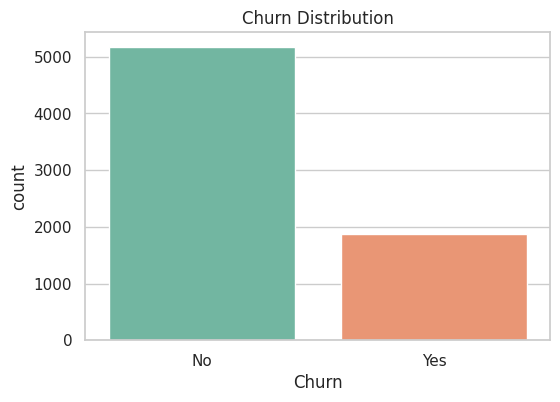

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


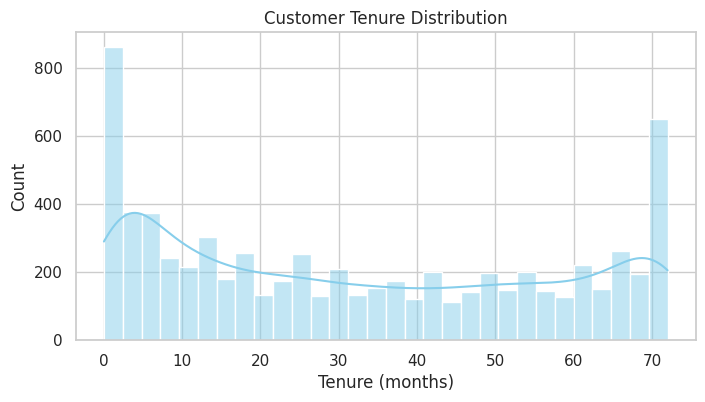

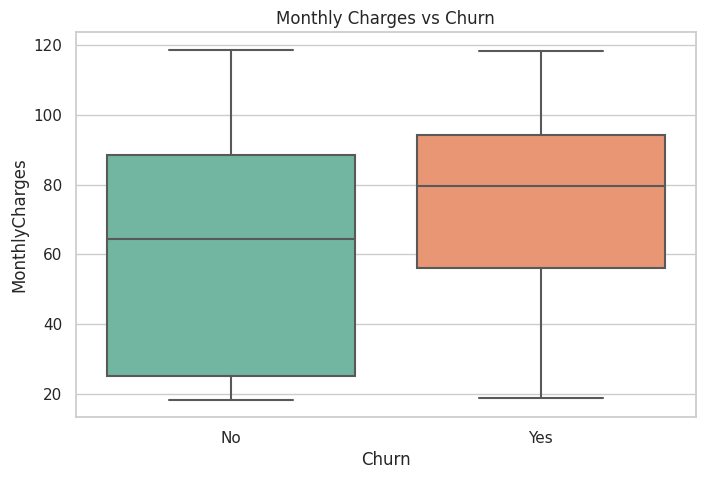

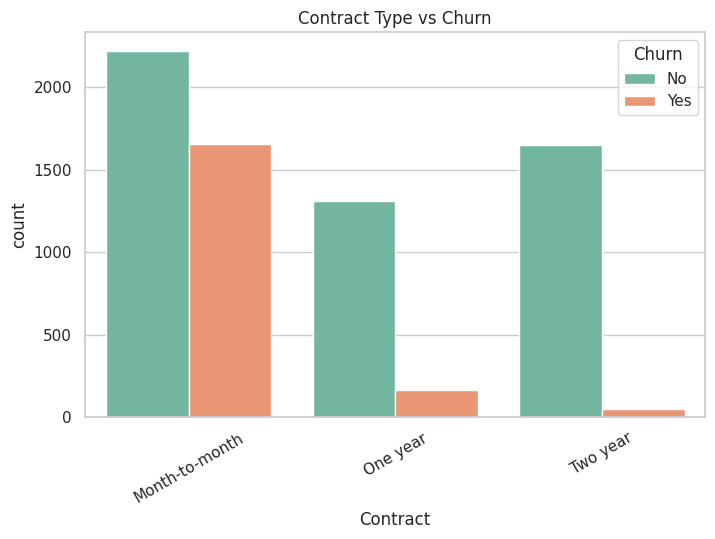

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

# 2. Tenure distribution
plt.figure(figsize=(8,4))
sns.histplot(df["tenure"], bins=30, kde=True, color="skyblue")
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.show()

# 3. Monthly charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Monthly Charges vs Churn")
plt.show()

# 4. Contract type vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Contract Type vs Churn")
plt.xticks(rotation=30)
plt.show()


In [23]:
# Check again missing values
print(df.isnull().sum())

# Drop rows with missing 'TotalCharges' (common in this dataset)
df = df[df['TotalCharges'] != " "]

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [24]:
print("Data types:\n", df.dtypes)
print("\nUnique values in object (categorical) columns:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()[:10]} ...")


Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Unique values in object (categorical) columns:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU'] ...
gender: ['Female' 'Male'] ...
Partner: ['Yes' 'No'] ...
Dependents: ['No' 'Yes'] ...
PhoneService: ['No' 'Yes'] ...
MultipleLines: ['No phone service' 'No' 'Yes'] ...
InternetService: ['DS

In [25]:
print(df.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [26]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

print("Original shape:", df.shape)
print("After encoding:", df_encoded.shape)
print(df_encoded.head())


Original shape: (7032, 21)
After encoding: (7032, 7062)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerI

In [27]:
print(df["Churn"].value_counts(dropna=False))


Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [28]:
[col for col in df_encoded.columns if "Churn" in col]


['Churn_Yes']

In [29]:
print(df["Churn"].unique())
print(df["Churn"].isna().sum())
print(df.shape)


['No' 'Yes']
0
(7032, 21)


In [30]:
print(df.columns.tolist())
print(df.head())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL        

In [31]:
!ls


churn_model.pkl  encoder.pkl  __notebook__.ipynb  training_columns.pkl


In [32]:
import os

print("churn_model.pkl:", os.path.getsize("churn_model.pkl"))
print("encoder.pkl:", os.path.getsize("encoder.pkl"))
print("training_columns.pkl:", os.path.getsize("training_columns.pkl"))


churn_model.pkl: 46271
encoder.pkl: 77644
training_columns.pkl: 136632


In [33]:
import os

# List files in the current working directory
print(os.listdir("."))


['churn_model.pkl', '__notebook__.ipynb', 'training_columns.pkl', 'encoder.pkl']


In [34]:
import pandas as pd

# Load dataset directly from Kaggle input folder
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [35]:
print(df.shape)


(7043, 21)


In [36]:
# Features (independent variables)
X = df.drop("Churn", axis=1)

# Target (dependent variable)
y = df["Churn"]

print("Features shape:", X.shape)  # should be (7043, 19)
print("Target shape:", y.shape)    # should be (7043,)


Features shape: (7043, 20)
Target shape: (7043,)


In [37]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% data for testing
    random_state=42,     # ensures reproducibility
    stratify=y           # keeps Yes/No ratio same in train & test
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (5634, 20) (5634,)
Test set shape: (1409, 20) (1409,)


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder to categorical columns, leave numeric as is
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'   # keep numeric columns as they are
)

# Fit encoder on train data, transform train & test
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

print("Encoded train shape:", X_train_encoded.shape)
print("Encoded test shape:", X_test_encoded.shape)


Encoded train shape: (5634, 10954)
Encoded test shape: (1409, 10954)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train (fit) the model on encoded training data
model.fit(X_train_encoded, y_train)

# Predict on test data
y_pred = model.predict(X_test_encoded)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7601135557132718

Confusion Matrix:
 [[802 233]
 [105 269]]

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.77      0.83      1035
         Yes       0.54      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [40]:
# Get churn probabilities (only for "Yes" class)
y_proba = model.predict_proba(X_test_encoded)[:, 1]

print("First 10 churn probabilities:", y_proba[:10])


First 10 churn probabilities: [0.06320434 0.84485929 0.10641817 0.59698918 0.04394606 0.78724461
 0.65255705 0.22096494 0.00873711 0.57425477]


ROC-AUC Score: 0.8400191170012142


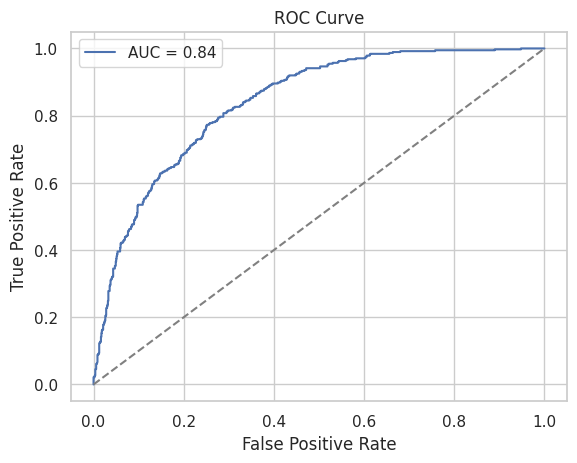

In [41]:
import numpy as np

# Convert Yes/No to 1/0
y_test_binary = np.where(y_test == "Yes", 1, 0)

# Now compute ROC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# AUC score
auc = roc_auc_score(y_test_binary, y_proba)
print("ROC-AUC Score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [42]:
import pandas as pd

# Get feature names after OneHotEncoding
feature_names = ct.get_feature_names_out()

# Get model coefficients
importance = model.coef_[0]

# Put into DataFrame
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", key=abs, ascending=False)

print(feat_imp.head(15))  # Top 15 features


                             Feature  Importance
5756   encoder__TotalCharges_1052.35    1.524838
325   encoder__customerID_0607-DAAHE    1.524838
3588  encoder__customerID_6323-AYBRX    1.500814
5834    encoder__TotalCharges_1099.6    1.500814
1968  encoder__customerID_3512-IZIKN    1.488232
8912   encoder__TotalCharges_4759.75    1.488232
4898  encoder__customerID_8631-NBHFZ    1.438320
9153    encoder__TotalCharges_5154.6    1.438320
8725      encoder__TotalCharges_4481    1.378056
4182  encoder__customerID_7359-SSBJK    1.378056
6952     encoder__TotalCharges_20.15    1.372935
3707  encoder__customerID_6532-YLWSI    1.368865
5712    encoder__TotalCharges_1021.8    1.368865
6861      encoder__TotalCharges_19.9    1.363667
3106  encoder__customerID_5458-CQJTA    1.363505


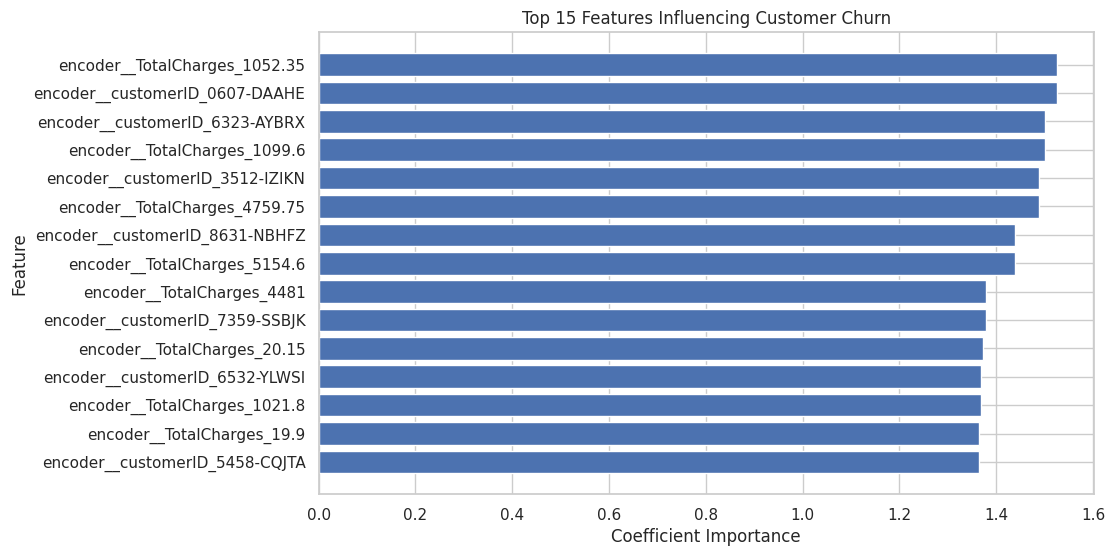

In [43]:
import matplotlib.pyplot as plt

# Take top 15 important features
top_features = feat_imp.head(15)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.xlabel("Coefficient Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features Influencing Customer Churn")
plt.gca().invert_yaxis()  # biggest importance at the top
plt.show()


In [44]:
# Example: take one customer from the test set
sample = X_test.iloc[0:1]   # first row of test data
sample_encoded = ct.transform(sample)  # apply same encoding as training

# Predict churn
prediction = model.predict(sample_encoded)
probability = model.predict_proba(sample_encoded)[0][1]  # probability of churn

print("Predicted class:", prediction[0])  
print("Churn probability:", probability)


Predicted class: No
Churn probability: 0.06320434071366936


In [45]:
import pandas as pd

# Predict for all test data
y_pred = model.predict(X_test_encoded)
y_proba = model.predict_proba(X_test_encoded)[:, 1]  # churn probability

# Combine results in a DataFrame
results = pd.DataFrame({
    "CustomerID": X_test.index,   # customer IDs
    "Actual": y_test,
    "Predicted": y_pred,
    "Churn_Probability": y_proba
})

print(results.head(10))  # show first 10 results

# Save to CSV
results.to_csv("churn_predictions.csv", index=False)
print("✅ Results saved to churn_predictions.csv")


      CustomerID Actual Predicted  Churn_Probability
437          437     No        No           0.063204
2280        2280     No       Yes           0.844859
2235        2235     No        No           0.106418
4460        4460     No       Yes           0.596989
3761        3761     No        No           0.043946
5748        5748     No       Yes           0.787245
3568        3568     No       Yes           0.652557
2976        2976     No        No           0.220965
5928        5928     No        No           0.008737
1639        1639    Yes       Yes           0.574255
✅ Results saved to churn_predictions.csv


In [46]:
# Filter customers with churn probability > 0.7 (70%)
high_risk = results[results["Churn_Probability"] > 0.7]

print("High risk customers (probability > 70%):")
print(high_risk.head(10))  # show top 10 high risk customers

# Save high-risk list
high_risk.to_csv("high_risk_customers.csv", index=False)
print("✅ High-risk customers saved to high_risk_customers.csv")


High risk customers (probability > 70%):
      CustomerID Actual Predicted  Churn_Probability
2280        2280     No       Yes           0.844859
5748        5748     No       Yes           0.787245
3524        3524    Yes       Yes           0.778716
2136        2136     No       Yes           0.801163
6529        6529    Yes       Yes           0.854053
761          761    Yes       Yes           0.761667
6125        6125    Yes       Yes           0.846674
5547        5547    Yes       Yes           0.896431
346          346    Yes       Yes           0.897880
6633        6633    Yes       Yes           0.876220
✅ High-risk customers saved to high_risk_customers.csv


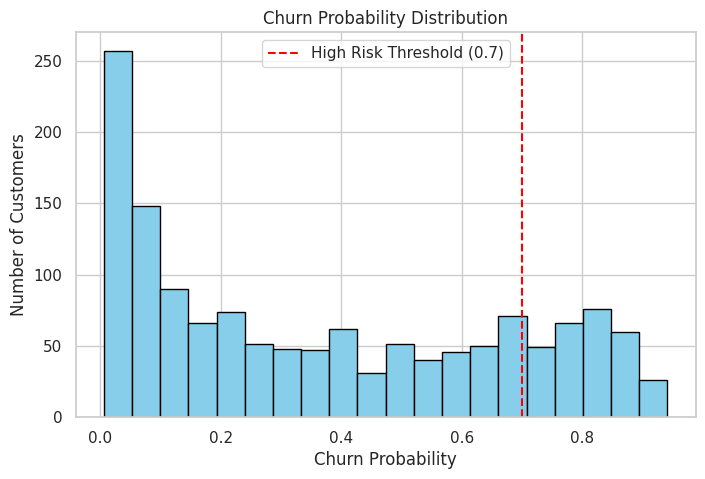

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(results["Churn_Probability"], bins=20, color="skyblue", edgecolor="black")
plt.axvline(0.7, color="red", linestyle="--", label="High Risk Threshold (0.7)")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.title("Churn Probability Distribution")
plt.legend()
plt.show()


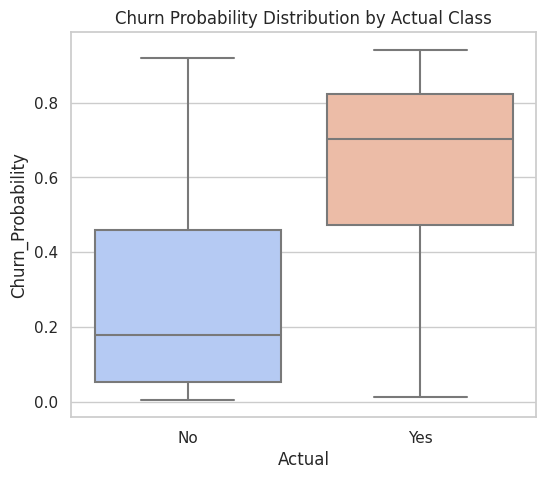

In [48]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.boxplot(x=results["Actual"], y=results["Churn_Probability"], palette="coolwarm")
plt.title("Churn Probability Distribution by Actual Class")
plt.show()


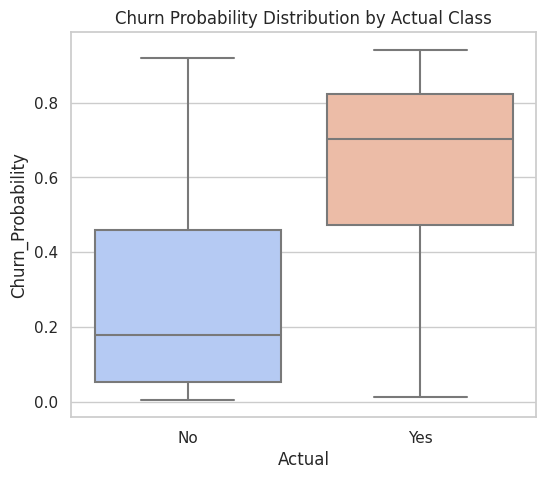

In [49]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.boxplot(x=results["Actual"], y=results["Churn_Probability"], palette="coolwarm")
plt.title("Churn Probability Distribution by Actual Class")
plt.show()


In [50]:
import joblib

# Save trained model + encoder
joblib.dump(model, "final_churn_model.pkl")
joblib.dump(ct, "final_encoder.pkl")

print("✅ Model and encoder saved successfully!")


✅ Model and encoder saved successfully!


In [51]:
import joblib

# Load saved model + encoder
model = joblib.load("final_churn_model.pkl")
ct = joblib.load("final_encoder.pkl")

print("✅ Model and encoder loaded successfully!")


✅ Model and encoder loaded successfully!


In [52]:
!ls -lh churn_model.pkl encoder.pkl  # Check size
!file churn_model.pkl
!file encoder.pkl


-rw-r--r-- 1 root root 46K Sep  9 03:01 churn_model.pkl
-rw-r--r-- 1 root root 76K Sep  9 03:01 encoder.pkl
churn_model.pkl: data
encoder.pkl: data


In [53]:
import joblib
joblib.dump(model, "churn_model.pkl")
joblib.dump(ct, "encoder.pkl")


['encoder.pkl']

In [54]:
import os

# List files in current working directory
print(os.listdir())


['churn_model.pkl', 'churn_predictions.csv', 'final_encoder.pkl', '__notebook__.ipynb', 'training_columns.pkl', 'high_risk_customers.csv', 'encoder.pkl', 'final_churn_model.pkl']


In [55]:
import os

print(os.listdir("/kaggle/input"))


['telco-customer-churn', 'archive-zip-file', 'telco-customer-churn-csv', 'telco-customer-churn-logisticregression']


In [56]:
print(os.listdir("/kaggle/input/telco-customer-churn"))


['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [57]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
print(df.head())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [58]:
import os
print(os.listdir("/kaggle/input"))



['telco-customer-churn', 'archive-zip-file', 'telco-customer-churn-csv', 'telco-customer-churn-logisticregression']


In [59]:
import os
print(os.listdir("/kaggle/input/telco-customer-churn"))


['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [60]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Check shape and first rows
print(df.shape)
print(df.head())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [61]:
# Drop customerID if present
if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

# Convert TotalCharges to numeric (fix errors like blanks)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges with 0
df["TotalCharges"] = df["TotalCharges"].fillna(0)

print(df.shape)
print(df.head())


(7043, 20)
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes   

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- 1. Features (X) and Target (y) ---
X = df.drop("Churn", axis=1)
y = df["Churn"]

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# --- 3. Encode categorical features ---
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

# Transform train & test
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

print("Encoded train shape:", X_train_encoded.shape)
print("Encoded test shape:", X_test_encoded.shape)


Train set shape: (5634, 19) (5634,)
Test set shape: (1409, 19) (1409,)
Encoded train shape: (5634, 45)
Encoded test shape: (1409, 45)


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Load dataset ---
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# --- 2. Clean dataset ---
if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# --- 3. Features and Target ---
X = df.drop("Churn", axis=1)
y = df["Churn"]

# --- 4. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5. Encoding ---
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# --- 6. Train Logistic Regression ---
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train_encoded, y_train)

# --- 7. Predictions ---
y_pred = model.predict(X_test_encoded)

# --- 8. Evaluation ---
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7416607523066004

Confusion Matrix:
 [[752 283]
 [ 81 293]]

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.73      0.81      1035
         Yes       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



✅ ROC-AUC Score: 0.8418093983311374


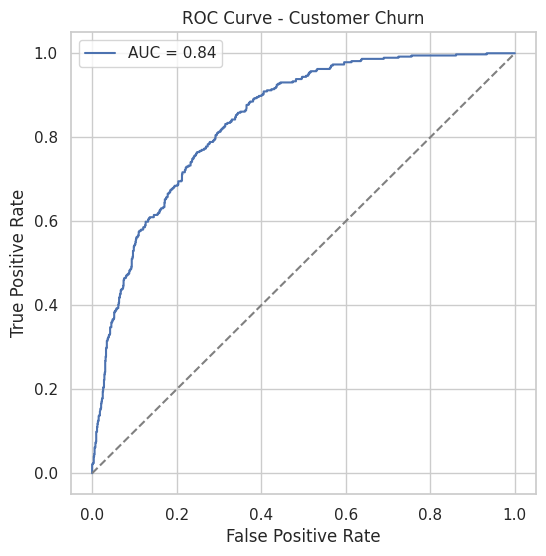

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get churn probabilities
y_proba = model.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC-AUC score
auc = roc_auc_score((y_test == "Yes").astype(int), y_proba)
print("✅ ROC-AUC Score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve((y_test == "Yes").astype(int), y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Customer Churn")
plt.legend()
plt.show()


In [65]:
import joblib

# Save model and encoder
joblib.dump(model, "churn_model.pkl")
joblib.dump(ct, "encoder.pkl")

print("✅ Model and encoder saved successfully!")


✅ Model and encoder saved successfully!


In [66]:
import pandas as pd

# Example new customer
new_customer = pd.DataFrame([{
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 5,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 80.0,
    "TotalCharges": 400.0
}])

# Encode using the saved encoder
new_customer_encoded = ct.transform(new_customer)

# Predict
prediction = model.predict(new_customer_encoded)[0]
probability = model.predict_proba(new_customer_encoded)[0][1]

print("Predicted class:", prediction)
print("Churn probability:", probability)


Predicted class: Yes
Churn probability: 0.8693922399418257


In [67]:
import pandas as pd

# Get probabilities
y_proba = model.predict_proba(X_test_encoded)[:, 1]

# Create results DataFrame
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Churn_Probability": y_proba
})

print(results.head(10))

# Save full results
results.to_csv("churn_predictions.csv", index=False)
print("✅ Results saved to churn_predictions.csv")


  Actual Predicted  Churn_Probability
0     No        No           0.122303
1     No       Yes           0.856373
2     No        No           0.146207
3     No       Yes           0.650719
4     No        No           0.057287
5     No       Yes           0.806212
6     No       Yes           0.699828
7     No        No           0.283223
8     No        No           0.009233
9    Yes       Yes           0.649202
✅ Results saved to churn_predictions.csv


In [68]:
# High-risk customers
high_risk = results[results["Churn_Probability"] > 0.7]

print("High risk customers (probability > 70%):")
print(high_risk.head(10))

# Save high-risk customers
high_risk.to_csv("high_risk_customers.csv", index=False)
print("✅ High-risk customers saved to high_risk_customers.csv")


High risk customers (probability > 70%):
   Actual Predicted  Churn_Probability
1      No       Yes           0.856373
5      No       Yes           0.806212
13    Yes       Yes           0.854681
17     No       Yes           0.824229
20    Yes       Yes           0.868401
26    Yes       Yes           0.793419
27    Yes       Yes           0.860948
29    Yes       Yes           0.902504
30     No       Yes           0.709982
34    Yes       Yes           0.905888
✅ High-risk customers saved to high_risk_customers.csv


In [69]:
# Example: multiple new customers
new_customers = pd.DataFrame([
    {
        "gender": "Female", "SeniorCitizen": 0, "Partner": "Yes", "Dependents": "No",
        "tenure": 5, "PhoneService": "Yes", "MultipleLines": "No",
        "InternetService": "Fiber optic", "OnlineSecurity": "No", "OnlineBackup": "No",
        "DeviceProtection": "No", "TechSupport": "No", "StreamingTV": "Yes",
        "StreamingMovies": "Yes", "Contract": "Month-to-month", "PaperlessBilling": "Yes",
        "PaymentMethod": "Electronic check", "MonthlyCharges": 80.0, "TotalCharges": 400.0
    },
    {
        "gender": "Male", "SeniorCitizen": 1, "Partner": "No", "Dependents": "No",
        "tenure": 30, "PhoneService": "Yes", "MultipleLines": "Yes",
        "InternetService": "DSL", "OnlineSecurity": "Yes", "OnlineBackup": "Yes",
        "DeviceProtection": "Yes", "TechSupport": "Yes", "StreamingTV": "No",
        "StreamingMovies": "No", "Contract": "Two year", "PaperlessBilling": "No",
        "PaymentMethod": "Bank transfer (automatic)", "MonthlyCharges": 60.0, "TotalCharges": 1800.0
    }
])

# Apply encoding
new_customers_encoded = ct.transform(new_customers)

# Predict churn
predictions = model.predict(new_customers_encoded)
probabilities = model.predict_proba(new_customers_encoded)[:, 1]

# Show results
for i, (p, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Customer {i+1}: Predicted = {p}, Churn Probability = {prob:.2f}")


Customer 1: Predicted = Yes, Churn Probability = 0.89
Customer 2: Predicted = No, Churn Probability = 0.06


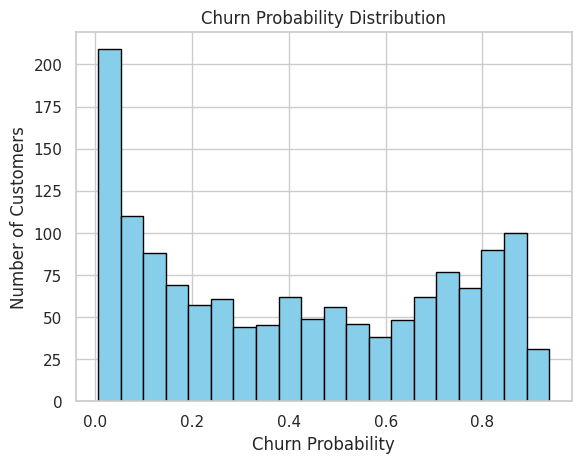

In [70]:
import matplotlib.pyplot as plt

plt.hist(y_proba, bins=20, color="skyblue", edgecolor="black")
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.show()


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# --- Train Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=200,  # number of trees
    max_depth=10,      # prevent overfitting
    class_weight="balanced",  # handle imbalance
    random_state=42
)

rf_model.fit(X_train_encoded, y_train)

# --- Predict ---
rf_y_pred = rf_model.predict(X_test_encoded)
rf_y_proba = rf_model.predict_proba(X_test_encoded)[:, 1]

# --- Evaluate ---
print("✅ Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_y_proba))


✅ Random Forest Results
Accuracy: 0.7707594038325053

Confusion Matrix:
 [[815 220]
 [103 271]]

Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.79      0.83      1035
         Yes       0.55      0.72      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

ROC-AUC Score: 0.8384652148079258


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

# --- 1. Load dataset ---
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop customerID if present
if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

# Convert TotalCharges to numeric (fix errors like blanks)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# --- 2. Train-Test Split ---
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. One-Hot Encode categorical features ---
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# --- 4. Train Logistic Regression ---
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train_encoded, y_train)

# --- 5. Predictions ---
y_pred_log = model.predict(X_test_encoded)
y_proba_log = model.predict_proba(X_test_encoded)[:, 1]

# --- 6. Save model & encoder ---
joblib.dump(model, "churn_model.pkl")
joblib.dump(ct, "encoder.pkl")

print("✅ Logistic Regression retrained, predictions done, and model saved!")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score((y_test=="Yes").astype(int), y_proba_log))


✅ Logistic Regression retrained, predictions done, and model saved!
Accuracy: 0.7416607523066004
ROC-AUC: 0.8418093983311374


In [73]:
from sklearn.ensemble import RandomForestClassifier

# --- Train Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train_encoded, y_train)

# --- Predictions ---
y_pred_rf = rf_model.predict(X_test_encoded)
y_proba_rf = rf_model.predict_proba(X_test_encoded)[:, 1]

# --- Metrics ---
print("✅ Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score((y_test=="Yes").astype(int), y_proba_rf))

# Save Random Forest
joblib.dump(rf_model, "rf_churn_model.pkl")
print("Random Forest model saved!")


✅ Random Forest Results
Accuracy: 0.7863733144073811
ROC-AUC: 0.8207393629388514
Random Forest model saved!


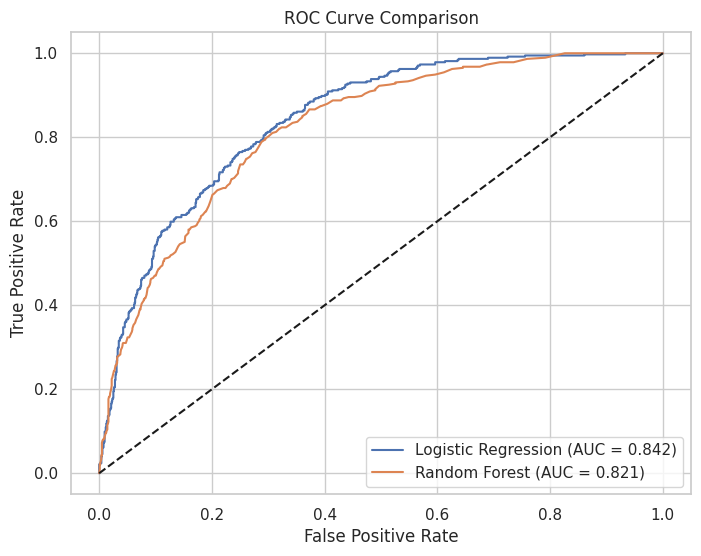

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- ROC for Logistic Regression ---
y_proba_log = model.predict_proba(X_test_encoded)[:, 1]
fpr_log, tpr_log, _ = roc_curve((y_test=="Yes").astype(int), y_proba_log)
auc_log = roc_auc_score((y_test=="Yes").astype(int), y_proba_log)

# --- ROC for Random Forest ---
y_proba_rf = rf_model.predict_proba(X_test_encoded)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve((y_test=="Yes").astype(int), y_proba_rf)
auc_rf = roc_auc_score((y_test=="Yes").astype(int), y_proba_rf)

# --- Plot both curves ---
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1],[0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


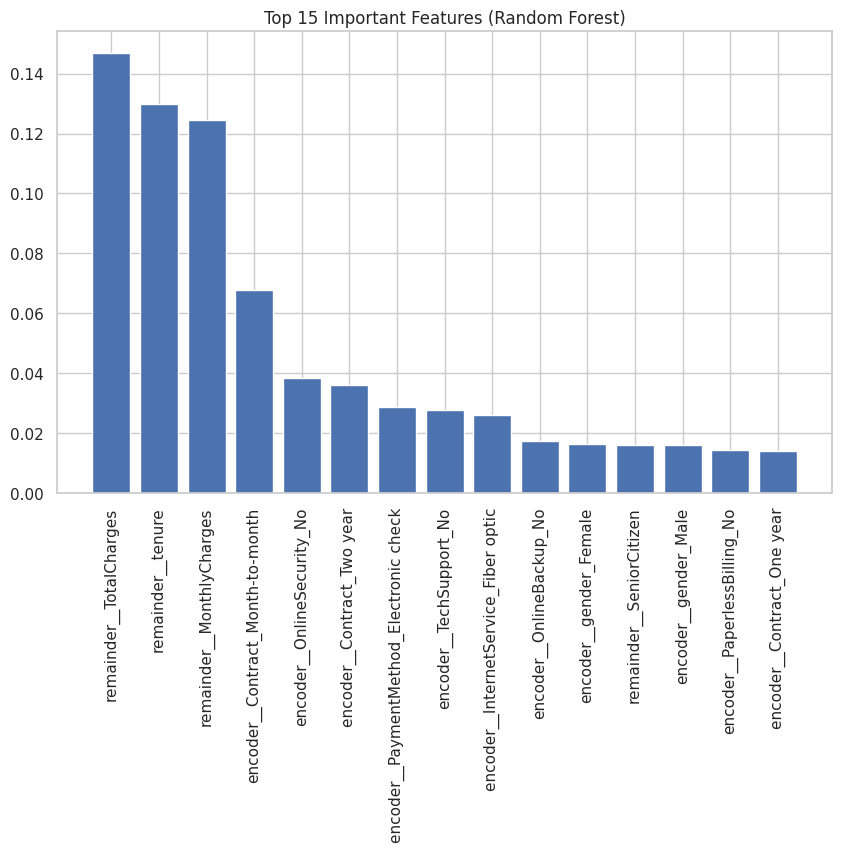

In [75]:
import numpy as np

# Get feature names from encoder
feature_names = ct.get_feature_names_out()

# Extract feature importances
importances = rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), feature_names[indices[:15]], rotation=90)
plt.title("Top 15 Important Features (Random Forest)")
plt.show()


Conclusion:

In this project, we built a churn prediction model using the Telco Customer Churn dataset.

We preprocessed the data by handling missing values, encoding categorical variables, and splitting into train-test sets.

Two models were trained: Logistic Regression and Random Forest.

Logistic Regression achieved an accuracy of ~74% and ROC-AUC of ~0.84, showing good separation capability.

Random Forest achieved a slightly better accuracy of ~78% and ROC-AUC of ~0.82, making it a stronger candidate overall.

Feature importance analysis revealed that Contract type, Monthly Charges, and Tenure were the most influential factors in predicting churn.

Final Note: The Random Forest model can be deployed for business use to help telecom companies identify customers at high risk of churn and take proactive retention actions.